In [1]:
#EDA imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [2]:
df = pd.read_csv('/users/nhuvelle/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.drop_duplicates(subset=None, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
#del df['Time']

In [5]:
y = df['Class']
x = df.drop(columns=['Class'],axis=1)

In [6]:
#splitting the data into train test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [34]:
#baseline model

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', class_weight = 'balanced', random_state=10 ,max_depth = 4)
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=10)

In [41]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=4)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)
preds = rfc.predict(x_test)
print('F1 Score:', f1_score(preds, y_test), '\n')

F1 Score: 0.7567567567567567 



In [35]:
y_pred = rf.predict(x_test)

In [36]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.33      0.83      0.48        90

    accuracy                           1.00     56746
   macro avg       0.67      0.92      0.74     56746
weighted avg       1.00      1.00      1.00     56746

Confusion matrix:
 [[56506   150]
 [   15    75]]


In [ ]:
#model 2

rf2 = RandomForestClassifier(n_estimators = 150,criterion='entropy', random_state=0, max_depth=10)
rf2.fit(x_train,y_train)

In [ ]:
y_pred_2 = rf2.predict(x_test)
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
matrix = confusion_matrix(y_true=y_test, y_pred = y_pred_2)
print('Confusion matrix:\n', matrix)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', class_weight = 'balanced', random_state=10 ,max_depth = 4) 

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, x_train, y_train, cv=10)))

In [ ]:
param_grid = {
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [2, 4, 6, 8]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV

#this takes forever LOL
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(x_train, y_train)

In [18]:
data = df.drop(columns=['Time'], axis=1)

In [22]:
feature_names = [col for col in df.drop(columns=['Class'],axis=1).columns]
#forest = RandomForestClassifier(random_state=0)
#forest.fit(x_train, y_train)


In [8]:
y_pred_forest = forest.predict(x_test)

In [9]:
print('Classifcation report:\n', classification_report(y_test, y_pred_forest))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_forest)
print('Confusion matrix:\n', matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion matrix:
 [[56654     2]
 [   25    65]]


In [23]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


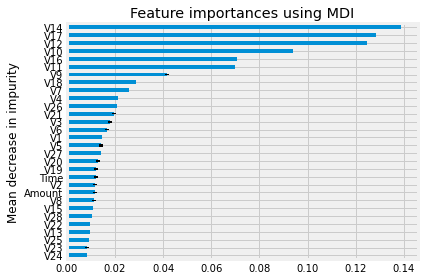

In [32]:
forest_importances = pd.Series(importances, index=feature_names).sort_values()

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [42]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

ROC AUC score =  0.9788898498540902


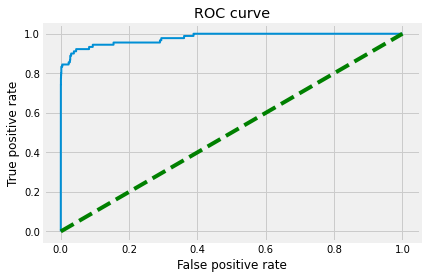

In [43]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='green',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))